In [1]:
import re
import numpy as np
import math
from matplotlib import pyplot as plt
import copy

In [2]:
with open("example.txt") as f:
    data = f.read()
    lines = data.strip().split("\n")

In [30]:
with open("input.txt") as f:
    data = f.read()
    lines = data.strip().split("\n")

In [31]:
board = []
for line in lines:
    board.append([])
    for char in line:
        if char.islower():
            hieght = ord(char) - ord("a") + 1
        elif char == "S":
            hieght = 28
        elif char == "E":
            hieght = 27
        board[-1].append(hieght)
        #print(ord(char))
board = np.array(board)

In [32]:
print(board.shape)

(41, 70)


In [33]:
print(board[(0,3)])

3


In [34]:
points = {(0,0):0}

In [35]:
end = np.where(board==27)
end = (end[0][-1],end[1][-1])
print(end)
part1 = True
if part1:
    start = np.where(board==28)
else:
    start = np.where(board==1)
tmp_start = {}
for point in zip(start[0],start[1]):
    tmp_start[point] = 0
        #print(point)
        #print(board[point])
start = tmp_start
print(type(start))
#print(start)
#start = {(start[0],start[1]):0}
points = copy.deepcopy(start)
past_points = copy.deepcopy(start)
#distance = traverse(board,start,start,end)
print(len(start))

(20, 46)
<class 'dict'>
1


In [36]:
#breadth first search
#def traverse(board,points,past_points,end):
new_points = {}

abort_count = 1000
it = 0
#while end not in new_points and it < abort_count:
while len(points) > 0 and it < abort_count:
    it += 1
    new_points = {}
    #print("started with",points)
    #print("past_points",past_points)
    for point in points:
        for d in [(-1,0),(1,0),(0,-1),(0,1)]:
            new_point = (point[0]+d[0],point[1]+d[1])
            #print("trying ",new_point)
            #print("thing in other",new_point not in past_points )
            if (new_point not in past_points 
                and new_point[0] >= 0 and new_point[0] < board.shape[0]
                and new_point[1] >= 0 and new_point[1] < board.shape[1]
                and board[point]+1 >= board[new_point]):
                #print("adding",new_point)
                new_points[new_point] = points[point]+1
    
    #new_points_dict = past_points | new_points
    past_points.update(new_points)
    points = new_points
    
    #if end in new_points:
    #    return new_points[end]
    #else:
        #print(type(past_points))
        #print(type(new_points))
    #    new_points_dict = past_points | new_points
        #print(new_points_dict)
    #    return traverse(board,new_points,new_points_dict,end)

In [37]:
print(past_points[end])

352


In [38]:
#import sys
#print(sys.getrecursionlimit())



#sys.setrecursionlimit(1500)

In [39]:
screen = np.zeros(board.shape)

In [40]:
for point in past_points:
    screen[point] = past_points[point]

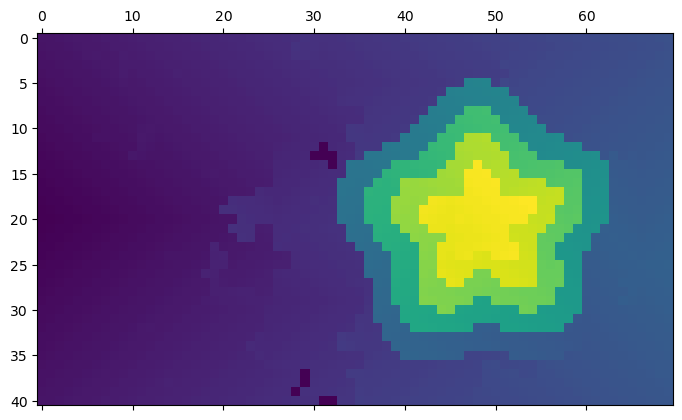

In [41]:
plt.matshow(screen)

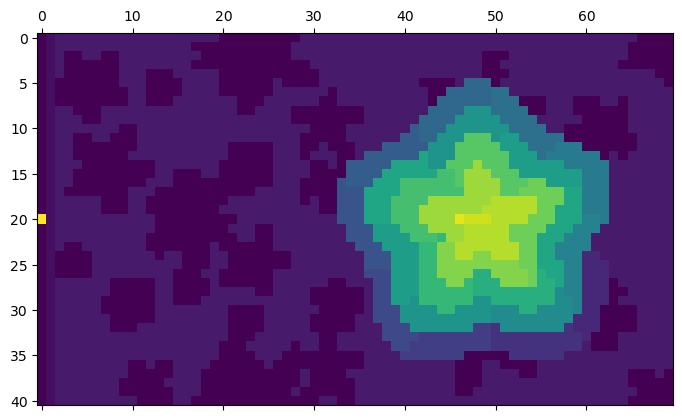

In [29]:
plt.matshow(board)